# 텍스트 마이닝의 이론과 실제(실습코드 포함)

201921529 김채연

목차

1. 텍스트 마이닝의 이해

2. 텍스트 마이닝 방법론(도구 및 원리의 이해)

3. 텍스트 마이닝의 문제점

4. 문제해결을 위한 방안 ( 기존의 방법, 딥러닝에 의한 방법)

5. **koNLPy 사용하여 실습해보기**


------------------
# 1.텍스트 마이닝의 이해

## 1.1. 텍스트 마이닝 (Text Mining)이란? 

- 텍스트에서 고품질 정보를 도출하는 과정으로 일반적으로 통계 패턴 학습과 같은 수단을 통해 **패턴**과 **트렌드**를 고안함으로써 도출된다.

- 본질적으로 **자연어 처리(NLP)**와 **분석 방법**의 적용을 통해 텍스트를 분석을 위한 데이터로 변환하는 것이 필요하다. (비정형 데이터를 정형데이터로 변형하기)


- unstructured text를 structured data로 바꾸기 **(일정한 길이 (sparse or dense) 의 vector로 변환)**
- 바꾼 후, structured data를 *text classification, clustering, *sentiment analysis, document summarization, translation, prediction, etc.* 한다. **(변형된 vector에 머신러닝 (딥러닝) 기법을 적용)**

*참고: text classification안에 sentiment analysis도 포함됨.



## 1.2. 텍스트 마이닝의 이해를 위한 기본 요구 지식
- **자연어 처리(Natural Language Processing)**

Tokenize, stemming, lemmatize
Chunking
BOW, TFIDF – sparse representation

- **통계학& 선형대수**

조건부 확률, 벡터, 선형결합 …

- **머신러닝**

회귀분석의 개념
머신러닝의 다양한 기법(나이브 베이즈, 

- **딥러닝**

Naïve Bayes, Logistic egression, Decision tree, SVM
Embedding(Word2Vec, Doc2Vec) – dense representation
RNN(LSTM), Attention, Transformer





## 1.3. 텍스트 마이닝 단계

비정형 데이터인 **Document**를 **tokenize(단어단위로 쪼개기)** 하고 **normalize(표준화)하기** **-->** 

**정규화된 단어들의 시퀀스(순서가 의미있는 리스트)** 가 됨 **-->**

(1) **시퀀스 정보가 없는 (순서 무시하는) 고정 크기 vector** (**-->** Naïve Bayes,Decision Tree,SVM, …,Logistic Regression,
MLP)

(2) **시퀀스 정보가 있는 (순서 정보가 있는, 문맥 정보가 있는) 고정 크기 vector** (**-->** Decision Tree,SVM, …,Logistic Regression,MLP)

(3) **시퀀스 정보가 포함된(순서 정보 유지) 일련의 단어 임베딩** (**-->**  RNN, Bi-LSTM,Transformer,BERT)





## 1.4. 텍스트 마이닝 적용 분야

(1) Document classification (감정분석 포함됨)

(2) Q&A (Document generation에 속함)

(3) summarization (Document generation에 속함)

(4) translation (Document generation에 속함)

(5) Keyword extraction (tagging/annotation)

(6) Topic modeling (ex. 여러 문서에서 공통적으로 이야기하는 topic 알아내기)


## 1.5. 텍스트 마이닝 도구 - 파이썬

- *NLTK

가장 많이 알려진 NLP 라이브러리(영어 기준으로)

- *Scikit Learn

머신러닝 라이브러리

기본적인 NLP, 다양한 텍스트 마이닝 관련 도구 지원

*참고:NLTK 와 Scikit Learn 같이 사용 가능

- Gensim

Word2Vec으로 유명

sklearn과 마찬가지로 다양한 텍스트 관련 도구 지원

- Keras

RNN, seq2seq 등 딥러닝 위주의 라이브러리 제공

- **pyTorch** 

딥러닝 관련 요즘 인기많은 패키지

--------------------
# 2. 텍스트 마이닝 방법론

## 2.1. 텍스트 마이닝 기본도구(NLP중심)

이 도구들은 **document, sentence(word들의 sequence) 등을 *sparse vector로 변환**하기 위한 목적을 가진다.

*참고: 값들 중에 0이 많으면, 값을 가진 애들이 희소하면 sparse라고 함.

• **Tokenize**

대상이 되는 문서/문장을 **최소 단위로 쪼갬**

• **Text normalization**

최소 단위를 **표준화**

• **POS-tagging**

최소 의미단위로 나누어진 대상에 대해 **품사를 부착**

• **Chunking**

POS-tagging의 결과를 **명사구, 형용사구, 분사구 등과 같은
말모듬으로 다시 합치는 과정**

• **BOW, TFIDF**

tokenized 결과를 이용하여 **문서를 vector로 표현**

### 2.1.1. Tokenize

#### Tokenize
- Document를 Sentence의 집합으로 분리(Sentence Tokenize)
- Sentence를 Word의 집합으로 분리(Word Tokenize)
- 의미 없는 문자 등을 걸러 냄

#### 영어 vs. 한글
- 영어는 공백(space) 기준으로 비교적 쉽게 tokenize 가능
- 한글은 구조상 형태소(morpheme) 분석이 필요
- 복합명사, 조사, 어미 등을 분리해내는 작업이 필요
- 영어에 비해 어렵고 정확도 낮음

### 2.1.2. Text Normalization

- 동일한 의미의 단어가 다른 형태를 갖는 것을 보완

다른 형태의 단어들을 통일시켜 표준단어로 변환 (**ex.** **go와 went** 는 시제는 다르나 같은 의미를 갖음.)

- **Stemming (어간 추출)**
단수 – 복수, 현재형 – 미래형 등 단어의 다양한 변형을 하나로 통일

의미가 아닌 **규칙**에 의한 변환 (**ex.** 영어의 현재진행형에는 **-ing** 가 붙음, 복수형은 **'-s'**가 붙음.)

영어의 경우, Porter stemmer, Lancaster stemmer 등이 유명

- **Lemmatization (표제어 추출)**

사전을 이용하여 **단어의 원형을 추출**

**품사**(part-of-speech)를 고려

영어의 경우, 유명한 어휘 데이터베이스인 **WordNet**을 이
용한 WordNet lemmatizer가 많이 쓰임


### 2.1.2.1. Stemming 예제 – Porter Stemmer

**원문**
- "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things"

**tokenize 결과**
- **'This', 'was'**, 'not', 'the', 'map', 'we', 'found', 'in', **'Billy', 'Bones'**, "'s", 'chest', ',', 'but', 'an',  **'accurate', 'copy'**, ',', **'complete'**, 'in', 'all', 'things’

**stemming 결과**
- **'thi', 'wa'**, 'not', 'the', 'map', 'we', 'found', 'in', **'billi', 'bone'**, "'s",'chest', ',', 'but', 'an', **'accur', 'copi'**, ',', **'complet'**, 'in', 'all', 'thing’

**문제점**
- this -> thi, was ->  wa, accurate -> accur 등 이상한 단어로 변환  **(ex. this와 was의 '-s'는 복수형이라 생각하고 생략됨)**
- 이는 사전이 아닌 **알고리즘(규칙)에 의해 변환하기 때문**

### 2.1.2.2. Lemmatization 예제 - WordNetLemmatizer

**원문**
- "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things"

**tokenize 결과**
- 'This', **'was'**, 'not', 'the', 'map', 'we', 'found', 'in', **'Billy', 'Bones'**, "'s",'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all',**'things'**

**결과**
- 'This', ***'wa'**, 'not', 'the', 'map', 'we', 'found', 'in', **'Billy', 'Bones'**, "'s",'chest', ',', 'but', 'an','accurate', 'copy', ',', 'complete', 'in', 'all', **'thing’**

- **'Billy', 'Bones'** 같은 고유명사는 그대로 유지됨
- **was는 품사를 모르기 때문에 형태적으로 접근**
- things는 **사전에 근거**하여 thing으로 변환
- 나머지 단어는 **사전의 원형을 유지**

### 2.1.3. POS-tagging(= 품사 태깅)

- 토큰화와 정규화 작업을 통해 나누어진 **형태소(의미를 가지는 최소단위)에 대해 품사를 결정하여 할당하는 작업**
-  동일한 단어라도 문맥에 따라 의미가 달라지므로 품사를 알기 위해서는 **문맥을 파악해야 함**
- Text-to-speech(텍스트를 읽어주는 시스템)에서도 각 단어에 대해 올바른 발음을 하기 위해 품사 태깅을 이용
- POS Tagging은 형태소 분석으로 번역되기도 하는데, 형태소 분석은 주어진 텍스트(원시말뭉치)를 형태소 단위로 나누는 작업을 포함하므로 앞의 토큰화, 정규화 작업에 품사 태깅을 포함한 것으로 보는 것이 타당


### 2.1.3.1. 한글 형태소 분석기 예제

- 한글 형태소 분석기 도구 - 파이썬

http://konlpy.org/ko/v0.4.3/
- 토큰화, 정규화, POS-tagging이 모두 이루어짐


ex).대상문장: 주택 문제의 경우 제 나이가 아직 젊으니까 가능성이 많지요.

|주택|주택/NNG|
|----|---------|
|문제의|문제/NNG+의/JKG|
|경우|경우/NNG|
|제|저/NP+의/JKG|
|나이가|나이/NNG+가/JKS|
|아직|아직/MAG|
|젊으니까|젊/VA+으니까/EC|
|가능성이|가능/XR+성/XSN+이/JKS|
|많지요|많/VA+지요/EC|

ex). 형태소 분석이 되어 **NNG의 경우 일반 명사**를 뜻하고  **JKG의 경우 관형격 조사**를 뜻한다.

### 2.1.4. Chunking (품사가 있어야 가능함.)

- Chunk는 언어학적으로 **말모듬**을 뜻하며, **명사구, 형용사구, 분사구 등과 같이 주어와 동사가 없는 두 단어 이상의 집합인 구(phrase)** 를 의미
- Chunking은 주어진 텍스트에서 이와 같은 chunk를 찾는 과정
- 즉, **형태소 분석의 결과인 각 형태소들을 서로 겹치지 않으면서 의미가 있는 구로 묶어나가는 과정임**
- 텍스트로부터 *Information Extraction(정보추출)을 하기 위한 전단계로 보거나 혹은 Information Extraction에 포함되기도 함

### 2.1.4.1. 개체명 인식(Named Entity Recognition, NER)
*Information Extraction(정보추출)의 대표적인 사례



- **개체명(Named Entity)** 은 기관, 단체, 사람, 날짜 등과 같이 **특정정보에 해당하는 명사구를 의미**
- 따라서 **NER은 텍스트로부터 뭔가 의미 있는 정보를 추출하기 위한 방법**으로 사용
- 예를 들어 “James is working at Disney in London”이라는 문장이 있을 때, **James는 PERSON, Disney는 ORGANIZATION, London은 GPE(지리적인 장소)임을 알아내는 작업.** 
- **관계 인식 (Relation Extraction)** 은 **NER에 의해 추출된 개체명들을 대상으로 그들 간의 관계를 추출하는 작업**, 특정 건물이 특정 장소에 위치하는 관계와 같은 지식을 텍스트로부터 추출할 때 사용(ex. 위 NER 예에서 in을 이용해 Disney는 London에 위치한다는 관계를 추출)

### 2.1.5. BOW (Bag of Words)
*sequence(위치)를 무시! 순서가 없다고 가정함.


**Vector Space Model**
- 문서를 bag of words 로 표현
- 단어가 쓰여진 **순서는 무시**
- 모든 문서에 한번 이상 나타난 단어들에 대해 **유(1)/무(0) 로 문서를 표현**

**count vector**
- 단어의 유/무 대신 **단어가 문서에 나타난 횟수**로 표현
- count가 weight로 작용


### 2.1.6. TFIDF(Term Frequency - Inverse Document Frequency)

**count vector의 문제점**
- **많은 문서에 공통적으로 나타난 단어는 중요성이 떨어지는 단어일 가능성이 높음** ex) the, a, …

**TFIDF**
- **단어의 count를 단어가 나타난 문서의 수로 나눠서 자주 등장하지 않는 단어의 weight를 올림**
- tf(d, t): 문서 d에 단어 t가 나타난 횟수, count vector와 동일,로그스케일 등 다양한 변형이 있음
- df(t): 전체 문서 중에서 단어 t를 포함하는 문서의 수
- idf(t): df(t)의 역수를 바로 쓸 수도 있으나, 여러가지 이유로 로그스케일과 스무딩을 적용한 공식을 사용,log(n/(1+df(t)), n은 전체 문서 수

### 2.1.6.1. TFIDF 계산 예제

**tokenize 결과 예제** (d1,d2는 문서 1,2 이다.)
- d1: fast, furious, shoot, shoot
- d2: fast, fast, fly, furious

**count vector: tf(d, t)** (count vector와 동일함!)

|word|fast|fly|furious|shoot|
|----|----|---|-------|-----|
|d1|1|0|1|2|
|d2|2|1|1|0|

**idf: log(n/(1+df(t))**
- fast, furious는 두 개의 문서에, fly, shoot는 하나의 문서에 출현
- 따라서 fast, furious는 중요도가 fly, shoot보다 떨어져야 함
- n(전체문서수)= 10으로 가정하면, **fast의 idf는 log(10/(1+2)) = 0.52, fly의 idf는 log(10/(1+1)) = 0.70**로 **하나의 문서에 출현한 fly의 값이 더 높은 것을 확인할 수 있음!**

**TFIDF: tf(d, t) * idf(t)**
- 가중치가 변화함.

|word|fast|fly|furious|shoot|
|----|----|---|-------|-----|
|d1|1*0.52|0*0.70|1*0.52|2*0.70|
|d2|2*0.52|1*0.70|1*0.52|0*0.70|

## 2.2. Naïve Bayes (Text Classification with BOW/TFIDF)

- 딥러닝을 잘 몰라도 좋은 성과를 낼 수 있음.
- 텍스트에 널리 사용되는 (일반적인) 분류 방법
- (x1,… xn) 의 단어집합으로 이루어진 문서가 분류 Ck에 속할 확률

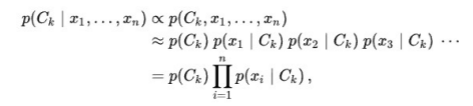
- 위 확률이 가장 큰 Ck로 분류



## 2.3. Logistic Regression

**분류를 위한 회귀분석**
- 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용
- 종속 변수가 범주형 데이터를 대상으로 하며, 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 **분류 (classification) 기법**에 해당

**텍스트 마이닝에서의 문제**
- 추정해야 할 계수가 vector의 크기(단어의 수)만큼 존재하므로, **과적합이 발생하기 쉽고 많은 데이터 셋이 필요**
- **그럼에도 불구하고 잘 작동하는 편**
- 정규화(regulation)을 이용해 과적합 해결 노력

## 2.4. Ridge and Lasso Regression

**릿지 회귀 (Ridge regression)**

- 목적함수에 추정할 계수(parameter)에 대한 L2 norm(규제항)을 추가하여 **모형의 과적합을 방지**

**라쏘 회귀 (Lasso regression)**
- L1 norm을 규제항으로 사용함으로써 0에 가까운 계수를 0으로 만들어 **영향을 거의 미치지 않는 단어들을 제외**
- 남은 단어들로 분류의 이유에 대해 설명이 가능하다는 장점이 있음
- **feature selection의 효과가 있음**

## 2.5. 한글 감성분석 예제

**데이터 예시**
- label이 **0이면 부정, 1이면 긍정**

|리뷰 |Label|
|-----|-----|
|아 더빙… 진짜 짜증나네요 목소리| 0|
|교도소 이야기구먼.. 솔직히 재미는 없다.. |0|
|너무 재밌었다그래서보는것을추천한다 |1|

- 리뷰를 BOW로 변환 후 input으로 쓰고, label을 target으로 하여 학습
- 나이브베이즈, 로지스틱 회귀분석, SVM 등 다양한 방법의 사용이 가능
- 새로운 리뷰에 대해 긍정/부정을 예측

-----------
# 3. 텍스트 마이닝의 문제

## 3.1. Curse of Dimensionality

**차원의 저주**
- Extremely sparse data
- 각 데이터 간의 거리가 너무 멀게 위치 -> 데이터를 다루기 힘듦!

**해결방법**
- 더 많은 데이터 쓰기
- Dimension reduction( 차원 축소하기)-feature selection, feature extraction

## 3.2. 단어 빈도의 불균형

**Zipf’s law(멱법칙)**
- 극히 소수의 데이터가 결정적인 영향을 미치게 됨(단어들의 빈도가 소수의 단어에 너무 치우쳐져 있어서!)

**해결방안**
- feature selection-빈도 높은 단어를 삭제,심한 경우 50% 삭제하기도 함.
- Boolean BOW 사용-1이상이면 1로 변환(유무)
- log 등의 함수를 이용해 weight를 변경

## 3.3. 단어가 쓰인 순서정보(문맥정보)의 손실

**통계에 의한 의미 파악 vs. 순서에 의한 의미 파악**

**Loss of sequence information**
- 단어들의 순서, context(문맥)가 중요,
- 특히 번역과 같은 sequence-to-sequence 문제에서 매우 중
요

**해결방안**
- n-gram

부분적 해결, 주로 classification 문제에서 유용

- Deep learning(근본적인 해결방법!)

RNN, Attention, Transformer, BERT


-------------
# 4. 문제의 해결 방안

## Dimensionality Reduction (차원 축소)

- 차원의 저주를 해결하기 위한 노력
- **Feature selection**-Manual, Regularization(Lasso)
- **Feature extraction**-PCA, LSA(SVD)
- **Embedding**-Word embedding, Document embedding
- **Deep Learning**-RBM, Autoencoder

___________________________

## Feature Extraction
- 측정된 데이터의 초기 집합에서 시작하여 정보 제공 및 비정보가 되도록 의도된 파생 값(추적)을 구축함.
### 1. 주성분 분석 (Principal Component Analysis,PCA)
- 데이터의 분산을 최대한 보존하는 새로운 축을 찾아 변환함으로써 차원을 축소(**정보를 최대한 유지하기 위해**)

**선형결합 (linear combination)**
- X (데이터, nxp): n(sample의 수), p(변수의 수)
- Xi: i번째 feature에 대한 크기 n의 vector
- Z(X의 선형결합으로 이루어진 새로운 변수, nxp) = XVT
- VT: 새로운 축 (pxp)  공분산행렬의 고유벡터로 구성

**공분산행렬**
- 고유값이 큰 순서대로 고유벡터를 정렬하여 차원 선택
- 선택된 고유벡터와 X의 선형결합으로 차원 축소

### 2. LSA(Latent Semantic Analysis)
- 문서와 용어에 관련된 개념의 집합을 생산함으로써 문서 집합과 그것들이 포함하는 용어 사이의 관계를 분석하는 자연어 처리, 특히 분포 의미론에서의 기술.
- LSA는 **의미와 가까운 단어가 유사한 텍스트 조각에서 발생한다고 가정**(the distributional hypothesis)


### 3. Topic Modeling
- 가정 하에 word들을 알고 있음. **각 문서들은 다양한 topic을 가지고 있는데 문서들이 어떤 topic을 가지고 만들었을지, 단어 비중은 어떻게 될 지 파악.**
- 문서들이 많이 있을 때 분석하는 방법.
- 각 문서들이 특정한 topic에 속할 확률분포와 주제로부터 특정 단어들이 파생되어 나올 확률분포가 주어졌을 때, 이 두 확률분포를 조합하여 각 문서들에 들어가는 단어들의 확률분포를 계산함.
- 활용사례: 드라마 시청률 변화와 소셜미디어 topic변화가 주는 영향.


_________________________

## Embedding
### 4. Word Embedding
- 단어에 대한 vector의 dimension reduction이 목표
- **one-hot-encoding**: 모든 단어들의 거리가 같음, **한 행(한 문서)에 1을 가지는 vector(단어)가 단 하나만 있어야 함(sprase vector)**. 단점은 vector의 길이가 너무 큼.
- Word Embedding은 one-hot-encoding으로 표현된 단어를 dense vector로 변환하여 학습함.

### 5. Word2Vec
문장에 나타난 단어들의 순서를 이용해 **word embedding을 수행**
- CBOW: 주변단어들을 이용해 다음 단어를 예측(나머지 단어들을 입력하여 target 단어를 예측하는 형태.)
- Skip-gram: 한 단어의 주변단어들을 예측

- 단어의 위치에 기반하여 의미를 내포하는 vector 생성
- 비슷한 위치에 나타나는 단어들은 비슷한 vector를 가지게 됨
- 단어 간의 유사성을 이용하여 연산이 가능

### 6. ELMo (Embeddings from Language Model)
- 사전에 훈련된 언어 모델을 사용하는 워드 임베딩 방법론
- Word2Vec과 비슷함. 하지만 **Word2Vec**이나 **GloVe**가 **동일한 단어가 문맥에 따라 전혀 다른 의미를 가지는 것을 반영하지 못하는 것**에 비해,**ELMo**는 이러한 **문맥을 반영함**

ex). '나는 **배**를 타고 갔다.' , '나는 **배**를 먹었다.' 에서 '**배**'를  **Word2Vec**와 **GloVe**는 같은 단어로 보지만 ELMo는 구분 가능함. 

- 문맥의 파악을 위해 **biLSTM**으로 학습된 모형을 이용

__________________________________

## Deep Learning
### 7. RBM (Restricted Boltzmann Machine)
- 지금은 거의 사용하지 않지만, **딥러닝의 문을 연 기법**
- 차원의 저주를 극복하기 위한 기법으로 차원을 변경하면서 원래의 정보량을 최대한 유지하는 것이 목적

### 8.Context(sequence)의 파악
#### 8.1. N-gram
- **문맥(context)를 파악**하기 위한 전통적 방법
- 대상이 되는 **문자열을 하나의 단어 단위가 아닌, 두개 이상의 단위로 잘라서 처리**
- 단어의 수를 몇개씩 묶는 지에 따라 **Unigram,Bi-gram, Tri-gram**으로 나뉘어짐.
- 보통 unigram에 bi-gram, tri-gram을 추가하면서 feature의 수가 증가시켜 사용
- 문맥 파악에 유리하나, **dimension이 더욱 증가**함.

ex).

|문장|" The future depends on what we do in the present”|
|----|---------------------------------------------------|
|Unigram|The, future, depends, on, what, we, do, in, the, present|
|Bi-gram|'The future’, ‘future depends’, ‘depends on’, ‘on what’, …|
|Tri-gram|‘The future depends’, ‘future depends on’, ‘depends on what’,| 

#### 8.2. 딥러닝- RNN
- 문장을 단어들의 sequence 혹은 series로 처리
- **뒷 단어에 대한 hidden node가 앞 단어의 hidden node 값에도 영향을 받도록 함( 앞의 문맥의 정보가 계속 축적되어 영향을 미침.)**
- 그 외에도 단어들 간의 관계를 학습할 수 있는 모형을 고안
- 문서의 크기를 제한하여 앞부분을 버리기도 함. 
- 일반적인 문서 분류는 다 축적되므로 마지막 노드만 사용함.

### 9.  LSTM & Bi-LSTM
- **RNN**은 (문장이 길수록 층이 깊은 형태를 갖게 됨 -> 경사가 소실되는 문제 발생 -> **앞부분의 단어 정보가 학습되지 않음.) 의 문제점을 가지고 있음.**
- **LSTM**는 직통 통로를 만들어 RNN의 문제를 해결
- 단방향 **LSTM**는 단어 순서가 갖는 문맥 정보가 한 방향으로만 학습되므로 **자신의 뒤에 오는 단어에 의해 영향을 받는 경우는 학습이 되지 않는 문제점을 가짐.**
- **Bi-LSTM**는 양방향으로 LSTM을 구성하여 두 결과를 합치므로 양방향 순서를 모두 학습함.

### 10. 합성곱 신경망(Convolutional Neural Networks, CNN)
- **이미지 처리**를 위해 개발된 신경망
- 주변 정보를 학습한다는 점을 이용하여 **텍스트의 문맥을 학습하여 문서를 분류가 뛰어난 성능**을 보이게 되면서 자연어 처리에서의 활용분야가 넓어지게 됨.
- CNN은 **합성곱층(conolution layer)** 와 **풀링층(pooling)**으로 구성

### 11. Sequence-to-sequence
- **번역**을 위해 나옴.
- 번역, chat-bot, summarize등은 입력 뿐 아니라 **출력도 sequence가 되어야 함**
- encoder, decoder의 구조

### 12. Attention
- 앞의 문장에서 뒤에 생성하는 단어들에 대해 직접적인 링크를 받겠다는 것. (**입력의 단어들(Incoder)로부터 출력 단어(Decoder)에 직접 링크를 만듦**)
- 출력에 나온 어떤 단어는 입력에 있는 특정 단어들에 민감한 것에 착안


### 13. Transformer (Self-attention)
- 같은 문장, **한 문장으로부터 qttention을 받음**.
- 입력 단어들끼리도 상호연관성이 있는 것에 착안


### 14. BERT (Bidirectional Encoder Representations form Transformer)

- **양방향 transformer 인코더**를 사용
- 반대로 **OpenAI GPT는 Decoder만을 사용**. 한 쪽 방향.
- encoder와 decoder가 서로 다른 attention 구조를 사용
- RNN 사용하지 않음.

-----------------
# 5. koNLPy사용하여 실습해보기

In [3]:
# 예제파일 가져오기
# koNLPy corpus에서 대한민국헌법 텍스트 파일을 로드

from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()

In [4]:
print(type(c)) #가져온 데이터의 type을 확인
print(len(c)) # 데이터의 길이 확인
print(c[:500]) # 데이터 전체 길이 중 500길이까지만 프린트하기


<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 


## NLTK를 이용해서 tokenize를 할 수 있을까? -> 배운대로 적용 시도

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c) # c 텍스트를 문장단위로 tokenize하기
print(len(c_sent)) # 데이터 길이 확인
print(c_sent[:5]) # 데이터 전체 중 5길이까지 프린트하기

357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaeyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# word 단위로 tokenize 하기
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words) # 데이터 길이 확인

4640

In [7]:
# 데이터 전체 중 50까지만 추출하기
print(c_words[:50])
# '.join(리스트)를 이용하면 매개변수로 들어온 ['a', 'b', 'c'] 이런 식의 리스트를 'abc'의 문자열로 합쳐서 반환해줌.
" ".join(c_words[:50]) 

['대한민국헌법', '유구한', '역사와', '전통에', '빛나는', '우리', '대한국민은', '3·1운동으로', '건립된', '대한민국임시정부의', '법통과', '불의에', '항거한', '4·19민주이념을', '계승하고', ',', '조국의', '민주개혁과', '평화적', '통일의', '사명에', '입각하여', '정의·인도와', '동포애로써', '민족의', '단결을', '공고히', '하고', ',', '모든', '사회적', '폐습과', '불의를', '타파하며', ',', '자율과', '조화를', '바탕으로', '자유민주적', '기본질서를', '더욱', '확고히', '하여', '정치·경제·사회·문화의', '모든', '영역에', '있어서', '각인의', '기회를', '균등히']


'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고 , 모든 사회적 폐습과 불의를 타파하며 , 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히'

## koNLPy의 형태소 분석 및 품사 태깅 기능 사용법

In [8]:
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c) #형태소 단위로 tokenize

In [9]:
len(tokens_c) # 데이터 길이 확인

8796

In [10]:
type(tokens_c) # 데이터 타입 확인

list

In [15]:
print(tokens_c[:50])
" ".join(tokens_c[:50]) # 데이터 전체 길이 중 50까지 리스트를 문자열로 합쳐서 반환

['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명']


'대한민국 헌법 \n\n 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 · 1 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 4 · 19 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명'

## nltk의 Text class를 이용하여 다양한 기능을 수행

In [18]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "대한민국헌법") 
c_nltk_text

<Text: 대한민국헌법>

In [19]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))
# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens)))

8796
1364


In [20]:
#단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab()

FreqDist({'의': 380, '.': 357, '에': 282, '을': 211, '\n': 195, '은': 179, '제': 178, '이': 176, '한다': 155, '·': 145, ...})

In [21]:
#그림을 그리기 전 한글폰트를 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

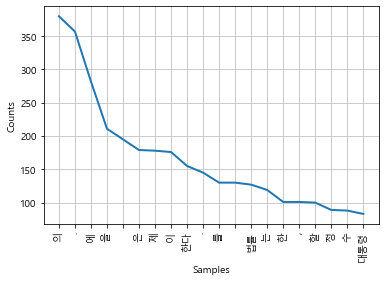

In [23]:
# 상위 20개의 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

문제점: 의미 없는 단어나 특수문자가 많으므로 정제가 필요

In [26]:
# 빈 리스트 생성
tokens_new = []
for token in tokens_c:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip())
print(len(tokens_new))

4520


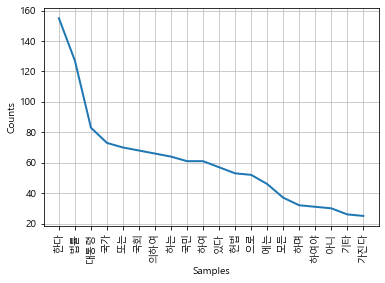

In [27]:
c_nltk_text = nltk.Text(tokens_new, name = "대한민국헌법")

# 상위 20개의 단어들의 빈도를 그래프로 출력
c_nltk_text.plot(20) 

In [32]:
#특정한 단어의 빈도를 알고 싶다면
c_nltk_text.count('대한민국')

11

In [31]:
c_nltk_text.count('국민')

61

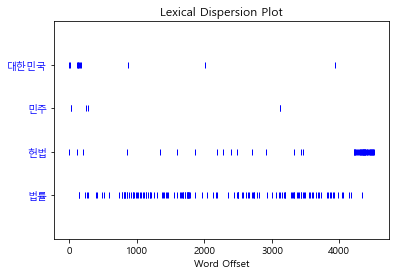

In [35]:
# 단어들 중 주어진 단어들의 위치를 표시
c_nltk_text.dispersion_plot(['대한민국', '민주', '헌법','법률'])

빈도 수가 많은 상위 20을 나타내는 위의 그래프에서 빈도가 2번째로 많았던 **'법률'** 이 마찬가지로 이번 그래프에서도 많은 빈도를 가지는 것을 확인할 수 있음. 상위 20에 들지 못했던 **'민주'** 는 빈도가 매우 작은 것을 확인할 수 있음.

## context를 보는 방법
concordance(): 주어진 단어를 중심으로 앞 뒤의 단어들을 보여 줌

In [36]:
# '헌법'을 중심으로 앞 뒤 단어들 출력
c_nltk_text.concordance('헌법')

Displaying 25 of 53 matches:
대한민국 헌법 유구 역사 전통 빛나는 우리 국민 운동 으로 건립 대한민국 임시정부
원히 확보 다짐 하면서 1948년 7월 12일 제정 되고 걸쳐 개정 헌법 이제 국회 의결 거쳐 국민투표 의하여 개정 한다 1조 대한민국 민주
방위 신성한 의무 수행 사명 으로 하며 정치 중립성 준수 된다 6조 헌법 의하여 체결 공포 조약 일반 으로 승인 국제 법규 국내법 같은 효력
청원 권리 가진다 국가 청원 대하 심사 의무 진다 27조 모든 국민 헌법 법률 법관 의하여 법률 의한 재판 받을 권리 가진다 군인 또는 군무
한다 모든 국민 보건 하여 국가 보호 받는다 37조 국민 자유 권리 헌법 열거 되지 아니한 이유 경시 되지 아니 한다 국민 모든 자유 권리 
시 하여야 한다 48조 국회 의장 인과 부의 선출 한다 49조 국회 헌법 또는 법률 특별한 규정 없는 재적 의원 과반수 출석 출석 의원 과반
 에서 예산안 의결 까지 다음 목적 경비 년도 예산 하여 집행 있다 헌법 이나 법률 의하여 설치 기관 또는 시설 유지 운영 법률상 지출 의무
위원회 위원 감사원장 감사 위원 기타 법률 공무원 직무 집행 있어서 헌법 이나 법률 배한 에는 국회 탄핵 의결 있다 항의 탄핵 국회 재적 의
 대하 국가 대표 한다 대통령 국가 독립 영토 보전 국가 계속 성과 헌법 수호 책무 진다 대통령 조국 평화 통일 성실한 의무 진다 행정권 대
이내 후임 선거 한다 69조 대통령 취임 즈음 하여 다음 선서 한다 헌법 준수 하고 국가 보위 하며 조국 평화 통일 국민 자유 복리 증진 민
교사절 신임 접수 또는 파견 하며 선전포고 강화 한다 74조 대통령 헌법 법률 하는 의하여 국군 통수 한다 국군 조직 편성 법률 한다 75조
 계엄 해제 요구 에는 대통령 이를 해제 하여야 한다 78조 대통령 헌법 법률 하는 의하여 공무원 임면한 79조 대통령 법률 하는 의하여 사
 한다 국정 계획 정부 일반 정책 선전 강화 기타 중요한 대외 정책 헌법 개정안 국민투표 조약 법률 

similar(): 주어진 단어와 비슷한 context에서 사용된 단어들을 반환

In [37]:
# '헌법'과 비슷한 context에서 사용된 단어들 출력
c_nltk_text.similar('헌법')

의하여 공포 행위 공공필요 국무총리 자격 정년


In [41]:
# '찬성'과 비슷한 context에서 사용된 단어들 출력
c_nltk_text.similar('찬성')

발의


collocation은 이례적으로 자주 함께 발생하는 단어들의 연속

In [42]:
nltk.download('stopwords')
# 함께 많이 나타난 단어들을 출력
c_nltk_text.collocations()

의하지 아니하고는; 국무총리 국무위원; 그러하지 아니하다; 단결권 단체교섭권; 헌법재판소 재판관; 단체교섭권 단체행동권;
인하여 불이익; 대법원 대법관; 단체행동권 가진다; 비밀선거 의하여; 대통령 국무총리; 국무위원 행정각부; 의하여 공무원


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaeyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 명사만 추출해서 처리하기
kkma와 Twitter 비교

In [43]:
nc = okt.nouns(c) #명사만 추출
print(len(nc)) # 데이터 길이 확인
print(" ".join(nc[:50])) # 데이터 전체 중 50까지, 리스트를 문자열로 합쳐 출력

3882
대한민국 헌법 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 법 통과 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입 각하 정의 인도 동포 애 로써 민족 단결 공고 모든 사회 폐습 불의 타파 자율 조화 바탕 자유민주 질서 더욱 정치 경제 사회 문화 모든


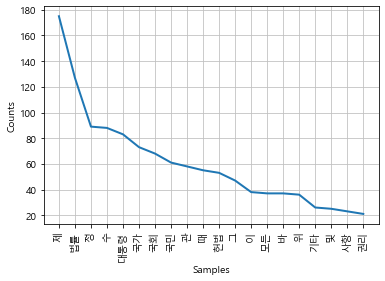

In [44]:
ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20) # 명사들 중 빈도가 높은 상위 20개 출력하여 그래프 그리기

## English Word Cloud

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [49]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   
files_en = gutenberg.fileids()      # 파일 id 가져오기
doc_en = gutenberg.open('austen-emma.txt').read()

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\chaeyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


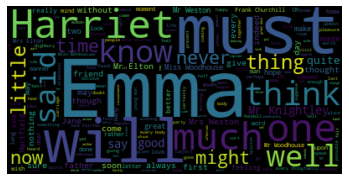

In [50]:
from wordcloud import WordCloud

# word cloud 이미지 생성하기
wordcloud = WordCloud().generate(doc_en)

# 생성된 이미지를 표시
# matplotlib 방법
import matplotlib.pyplot as plt
%matplotlib inline

# interpolation='bilinear' - 이미지를 부드럽게 있는 그대로 처리
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


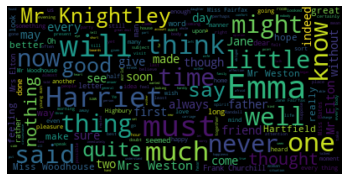

In [51]:
# 최대 font size를 40으로 줄여 worldcloud 생성하기
wordcloud = WordCloud(max_font_size=40).generate(doc_en)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 한글 Word Cloud
위에서 사용한 WordCloud 패키지를 이용하여 한글 word cloud도 그릴 수 있음
단 그냥 그리면 폰트가 깨지므로 한글폰트를 아래와 같이 지정해주어야 함

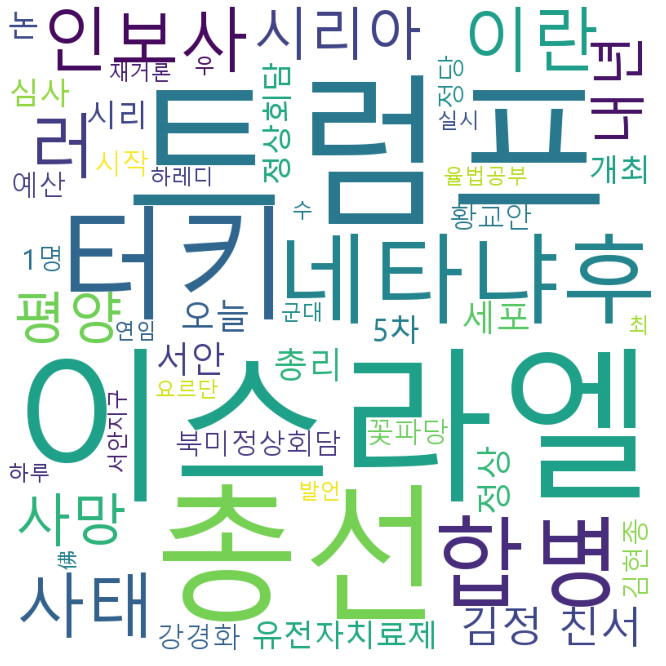

In [52]:
# text 파일로부터 읽어들여 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
font_path = 'c:/Windows/Fonts/malgun.ttf' #한글 폰트의 위치를 지정
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
    max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

text=open('test2.txt').read() #텍스트 파일을 읽음
wordcloud = wordcloud.generate(text) #워드 클라우드 생성
 
fig = plt.figure(figsize=(12,12)) #그림판 크기를 지정
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

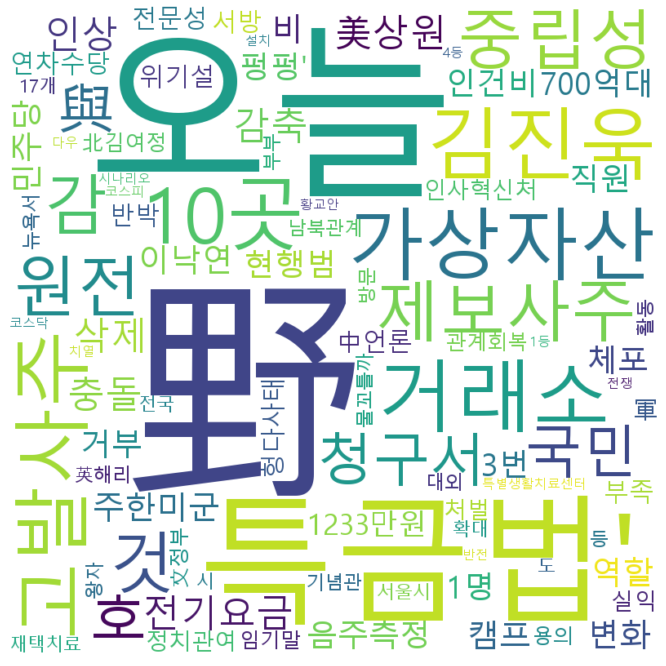

In [53]:
## 다음 한글 기사 읽어오기
from collections import Counter
import random
import webbrowser

from konlpy.tag import Hannanum
import sys
from bs4 import BeautifulSoup
import urllib.request as req


def get_bill_text_daum():
    url1 = "http://media.daum.net" #URL 변경됨
    res = req.urlopen(url1)
    soup = BeautifulSoup(res, "html.parser")

    text2=soup.select("strong.tit_g > a.link_txt")
    kk=[a.string for a in text2]
    corpus = ''
    for text in kk:
        text = text.replace('\r','').replace('\n','').replace('\t','')
        corpus = corpus + ' ' +text
     
    return corpus

def get_tags(text, ntags=50, multiplier=10):
    h = Hannanum()
    nouns = h.nouns(text)
    count = Counter(nouns)
    return(nouns)
   
text = get_bill_text_daum()
tags = get_tags(text)
#print(tags)
#print(" ".join(tags))

### 워드클라우드 그리기
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
   # max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

wordcloud = wordcloud.generate(" ".join(tags)) #위에서 만든 tags를 이용하여 word cloud 생성
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear") #글자의 테두리를 매끄럽게... 위의 결과와 비교
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png') #이미지 파일로 저장

동일한 데이터에 대하여 nltk를 이용해 빈도 그래프 그리기

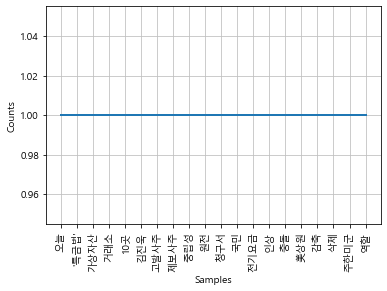

In [57]:
new_tags = []
for token in tags:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        new_tags.append(token.strip())

cnt = nltk.Text(new_tags, name = "다음기사수집")
cnt.plot(20)

## 외부 csv파일에서 데이터를 읽어와 필요한 부분에 대해서만 word cloud 그리기

In [67]:
import pandas as pd
df = pd.read_csv('movie_data.csv', header=None, names=['review', 'rate', 'name'])
df = df.dropna(axis=0)
df.columns.tolist()
#".".join(df.review.tolist())

['review', 'rate', 'name']

In [68]:
df.head() #파일의 내용 미리보기 (상위 5개)

,review,rate,name
0,오~~ 종합선물셋트,9.0,인피니티 워
2,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,10.0,인피니티 워
4,이제 남은건타노스 밖에,10.0,인피니티 워
6,타노스는 발암물질이다.,9.0,인피니티 워
8,정말재미있게봤습니다,10.0,인피니티 워


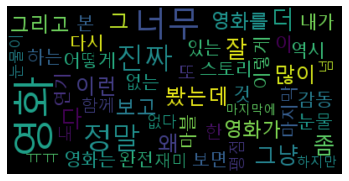

In [71]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    #width = 800,
    #height = 800, 
    #background_color='white',
    max_words=50
)

wordcloud = wordcloud.generate(" ".join(df.review.tolist())) 
 
fig = plt.figure()
#fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')